<a href="https://colab.research.google.com/github/Oscar8gonzalez8/MachineLearning/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Predictions Model

## Data Dictionary: 

`id` - Unique ID for each home sold

`date` - Date of the home sale

`price` - Price of each home sold

`bedrooms` - Number of bedrooms

`bathrooms` - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

`sqft_living` - Square footage of the apartments interior living space

`sqft_lot` - Square footage of the land space

`floors` - Number of floors

`waterfront` - A dummy variable for whether the apartment was overlooking the waterfront or not

`view` - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment

`grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

`sqft_above` - The square footage of the interior housing space that is above ground level

`sqft_basement` - The square footage of the interior housing space that is below ground level

`yr_built` - The year the house was initially built

`yr_renovated` - The year of the house’s last renovation

`zipcode` - What zipcode area the house was listed in

`lat` - Latitude

`long` - Longitude

`sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors

`sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Imports

In [ ]:
import pandas as pd
import seaborn as sns
import altair as alt
import plotnine as p9
from plotnine import ggplot, aes, geom_point, geom_smooth, geom_histogram, labs, geom_bar, theme, element_text, geom_smooth, geom_vline, scale_fill_manual, geom_abline
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
import numpy as np
from joblib import dump, load
from numpy import log10


In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
dat.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

## Data Exploration

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [ ]:
dat.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


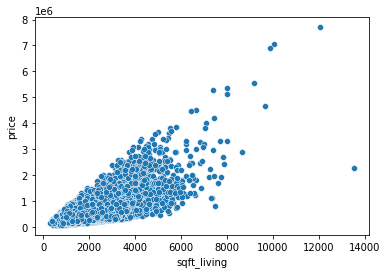

In [ ]:
sns.scatterplot(data = dat, x='sqft_living', y='price')

### Superfluous; info better displayed in graph below

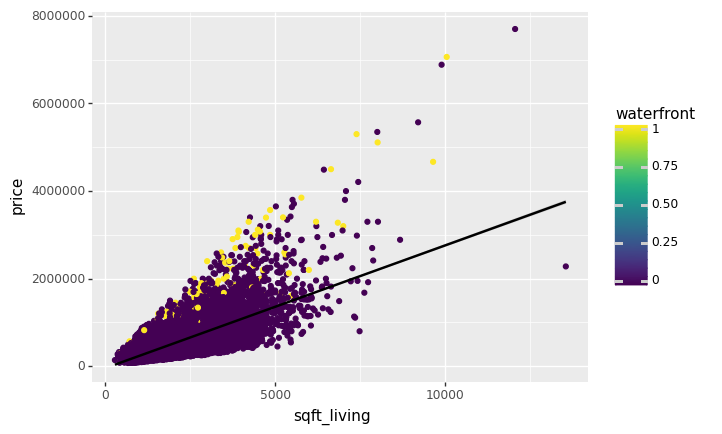

<ggplot: (8745329652321)>

In [ ]:
(ggplot(dat, aes(x='sqft_living', y='price', color = 'waterfront'))+
geom_point()+
 geom_smooth(method ='lm', se=True))

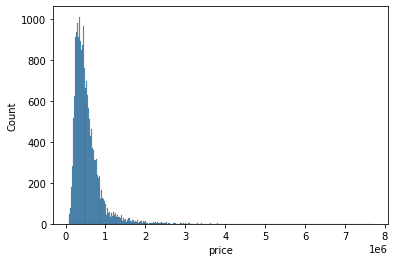

In [ ]:
sns.histplot(data = dat, x='price')

we may want to exclude homes with extremely high prices

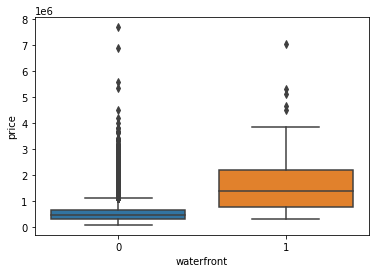

In [ ]:
sns.boxplot(data=dat, x='waterfront', y='price')

[01:13:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


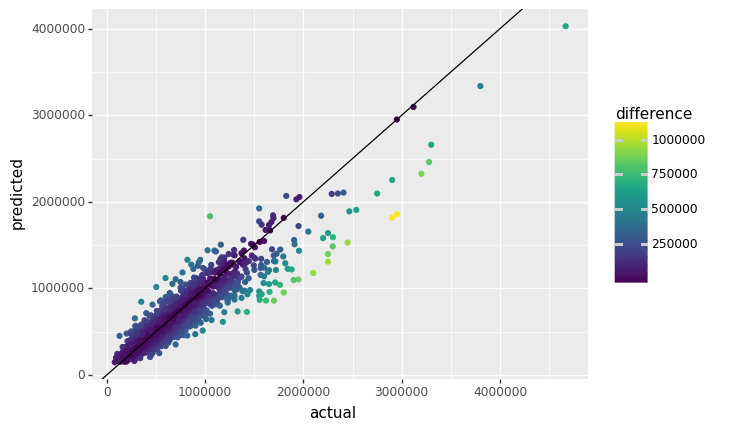

<ggplot: (8745328849005)>

In [ ]:
y = log10(dat['price'])
X = dat.drop(columns=['price', 'date'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)
# X_train
# X_test
# y_train
# y_test

model = XGBRegressor()
model = model.fit(X_train, y_train)
pred_val = model.predict(X_test)
# pred_val

predicted_price = pd.DataFrame(10**y_test)
predicted_price.columns = ['actual']
predicted_price['predicted'] = 10**pred_val
predicted_price['difference'] = abs(predicted_price['actual'] - predicted_price['predicted'])

predicted_price
predicted_price = predicted_price.query('difference <= 1200000')

chart = ggplot(predicted_price, aes(x='actual', y='predicted', color = 'difference'))+geom_point()
chart + geom_abline()

## Data Pre-Processing

In [ ]:
# Combines Archarlie's csv with our data

#Load median income
df2 = pd.read_csv("https://raw.githubusercontent.com/Archarlie2000/CS450-Team/main/income.csv", error_bad_lines=False)

#Treating data
dat['date'] = dat['date'].str[:8]
df2['NAME'] = df2['NAME'].str[5:]
df2['NAME'] = df2['NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df2.rename(columns = {'NAME':'zipcode'}, inplace = True)
df2.rename(columns = {'S1901_C01_012E':'median_income'}, inplace = True)

#Merge data back in
df3 = pd.merge(dat, df2, on = "zipcode", how = "left")
df3.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,median_income
0,1565930130,20141104,4,3.25,3760,4675,2.0,0,0,3,...,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0,114804
1,3279000420,20150115,3,1.75,1460,7800,1.0,0,0,2,...,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0,82566
2,194000575,20141014,4,1.00,1340,5800,1.5,0,2,3,...,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0,121967
3,2115510160,20141208,3,1.75,1440,8050,1.0,0,0,3,...,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0,82566
4,7522500005,20140815,2,1.50,1780,4750,1.0,0,0,4,...,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0,131508


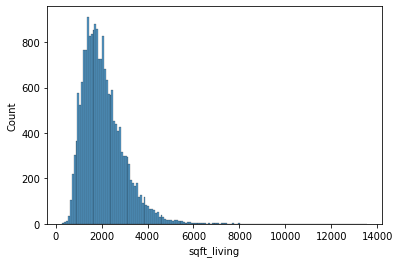

In [ ]:
sns.histplot(data= df3, x='sqft_living')

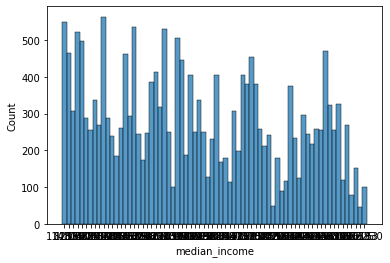

In [ ]:
sns.histplot(data=df3, x='median_income')

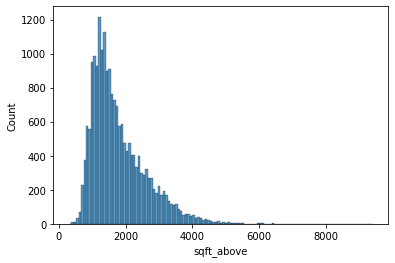

In [ ]:
sns.histplot(data=df3, x='sqft_above')

(0.0, 500.0)

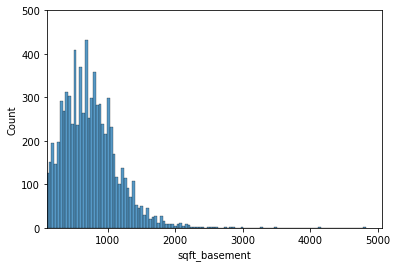

In [ ]:
sns.histplot(data=df3, x='sqft_basement')
plt.xlim(100,)
plt.ylim(0,500)

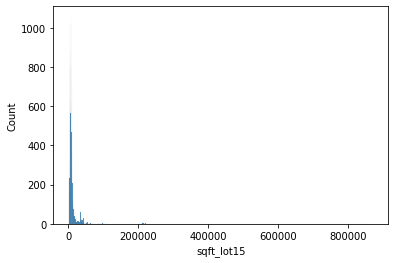

In [ ]:
sns.histplot(data=df3, x='sqft_lot15')

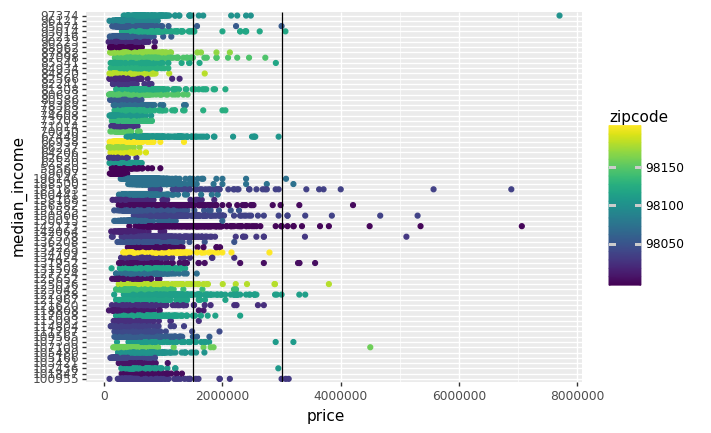

<ggplot: (8745329515653)>

In [ ]:
# sns.scatterplot(data = df3, y='price', x='zipcode')

# Shows price of sold homes at each zipcode along with the median income at each zipcode. The lines 
chart = ggplot(df3, aes(x='price', y='median_income', color = 'zipcode'))+geom_point()

chart + geom_vline(xintercept = 1500000) + geom_vline(xintercept = 3000000)

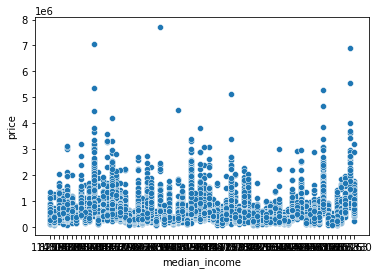

In [ ]:
sns.scatterplot(data = df3, y = 'price', x = 'median_income')

In [ ]:
from numpy import log10
#Normalize 
# Square living
# Square lot
# Add basement category
# square lot of average 15 nearest homes


#Add zscore column to normalize the data
df3['norm_sq_liv']= stats.zscore(df3['sqft_living'])
df3['norm_sq_lot']=stats.zscore(df3['sqft_lot'])
df3['has_bsmnt'] = df3['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
df3['norm_lot15']=stats.zscore(df3['sqft_lot15'])
df3['norm_price']= log10(df3['price'])

#Change Median income to int dtype
df3['median_income']=df3['median_income'].astype(int)

#Change date dtype, convert to string then concat month and year
df3['date']= pd.to_datetime(df3['date'])
df3['year']= pd.DatetimeIndex(df3['date']).year.astype(str)
df3['month'] = pd.DatetimeIndex(df3['date']).month.astype(str)
df3['year_month']= df3['year']+df3['month']
df3 = df3.drop(df3.filter(['year', 'month']).columns, axis=1)


# #Add log column to adjust outlier variables
#Decided not to include after testing
# df3['sq_livlog'] = log10(df3['sqft_living'])
# df3['sq_lotlog'] = log10(df3['sqft_lot'])
# df3['lot15log'] = log10(df3['sqft_lot15'])


#One hot encode the data
one_hot = pd.get_dummies(data=df3, columns = ['zipcode', 'year_month', 'condition', 'grade'], drop_first=True)

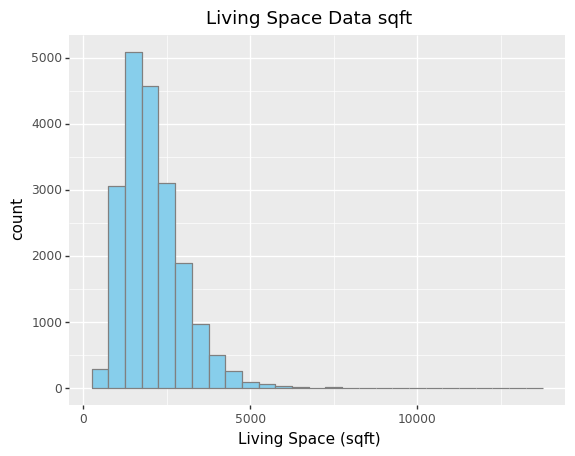

<ggplot: (8745333933141)>

In [ ]:
(ggplot(df3, aes(x='sqft_living'))+
        geom_histogram(color = 'gray', fill = 'skyblue', binwidth=500)+
        labs(title = 'Living Space Data sqft', x= 'Living Space (sqft)'))

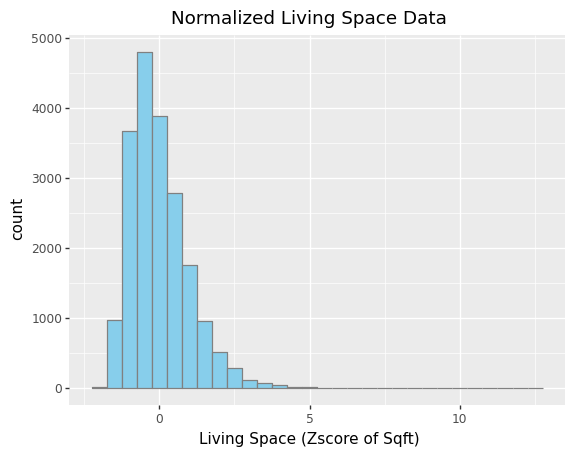

<ggplot: (8745329773129)>

In [ ]:
(ggplot(df3, aes(x='norm_sq_liv'))+
        geom_histogram(color = 'gray', fill = 'skyblue', binwidth= .5)+
        labs(title = 'Normalized Living Space Data', x= 'Living Space (Zscore of Sqft)'))

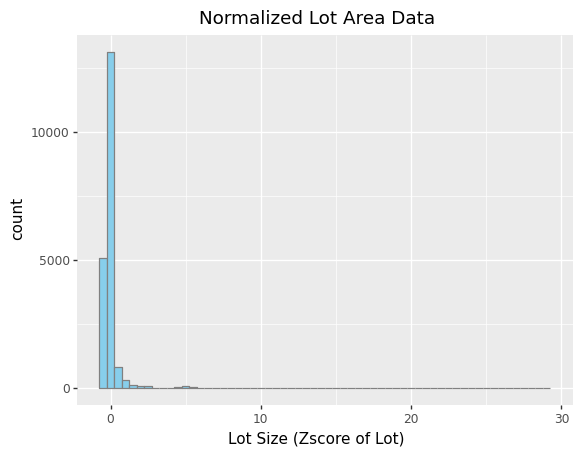

<ggplot: (8745330052473)>

In [ ]:
(ggplot(df3, aes(x='norm_sq_lot'))+
        geom_histogram(color = 'gray', fill = 'skyblue', binwidth= .5)+
        labs(title = 'Normalized Lot Area Data', x= 'Lot Size (Zscore of Lot)'))

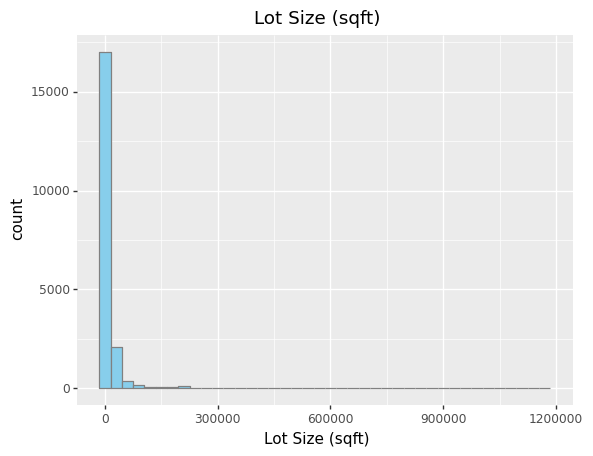

<ggplot: (8745330382489)>

In [ ]:
(ggplot(df3, aes(x='sqft_lot'))+
        geom_histogram(color = 'gray', fill = 'skyblue', binwidth= 30000)+
        labs(title = 'Lot Size (sqft)', x= 'Lot Size (sqft)'))

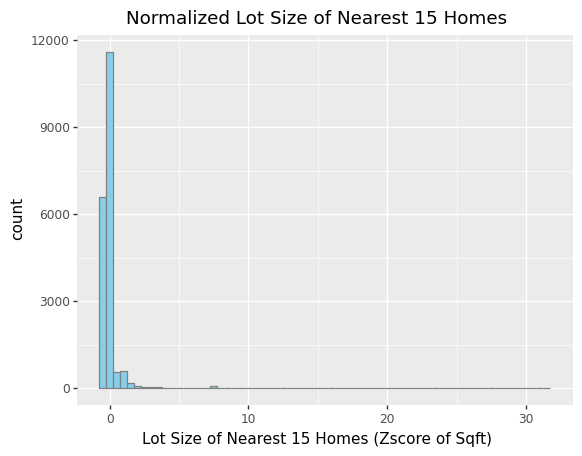

<ggplot: (8745330344161)>

In [ ]:
(ggplot(df3, aes(x='norm_lot15'))+
        geom_histogram(color = 'gray', fill = 'skyblue', binwidth= .5)+
        labs(title = 'Normalized Lot Size of Nearest 15 Homes', x= 'Lot Size of Nearest 15 Homes (Zscore of Sqft)'))

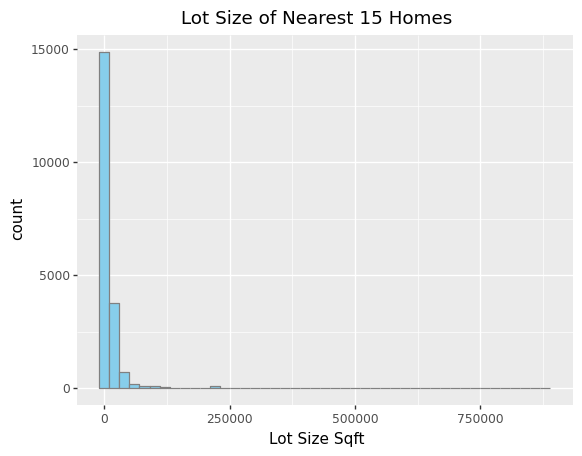

<ggplot: (8745329636773)>

In [ ]:
(ggplot(df3, aes(x='sqft_lot15'))+
        geom_histogram(color = 'gray', fill = 'skyblue', binwidth= 20000)+
        labs(title = 'Lot Size of Nearest 15 Homes', x= 'Lot Size Sqft'))

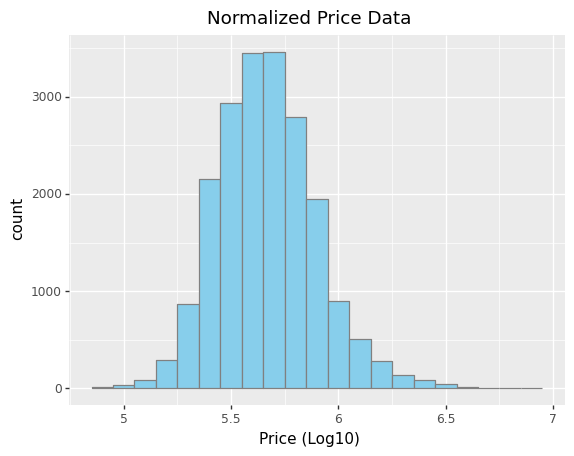

<ggplot: (8745330075725)>

In [ ]:
(ggplot(df3, aes(x='norm_price'))+
        geom_histogram(color = 'gray', fill = 'skyblue', binwidth= .1)+
        labs(title = 'Normalized Price Data', x= 'Price (Log10)'))

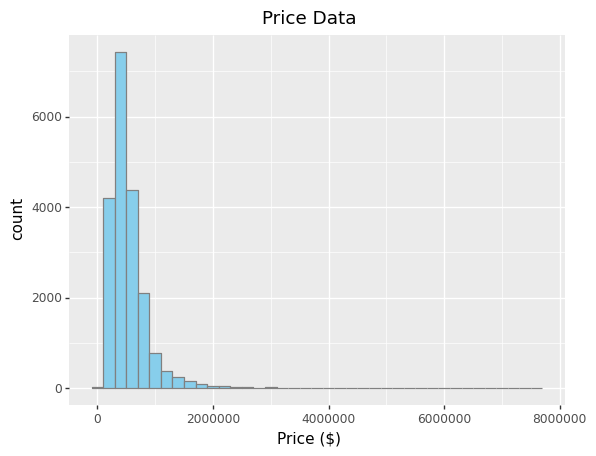

<ggplot: (8745329943197)>

In [ ]:
(ggplot(df3, aes(x='price'))+
        geom_histogram(color = 'gray', fill = 'skyblue', binwidth= 200000)+
        labs(title = 'Price Data', x= 'Price ($)'))

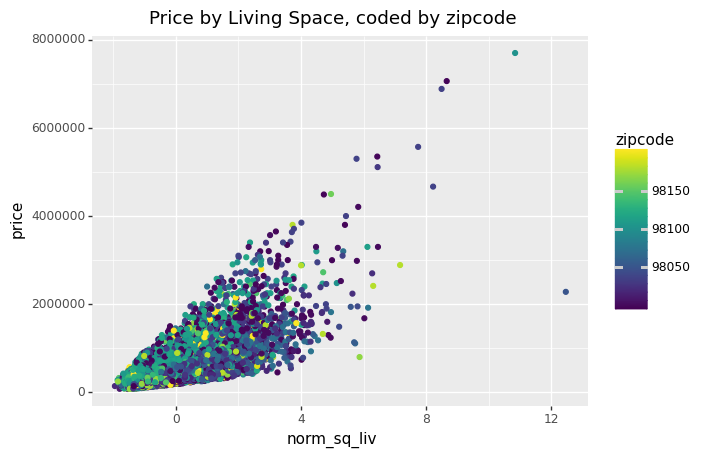

<ggplot: (8745329619533)>

In [ ]:
from plotnine.geoms.geom_boxplot import geom_boxplot
(ggplot(df3, aes(x='norm_sq_liv', y='price', color= 'zipcode'))+
 geom_point()+
 labs(title = 'Price by Living Space, coded by zipcode'))

In [ ]:
result = df3.groupby(df3['zipcode']).agg({'price':['std', 'mean', 'count']})
result.columns = ['std', 'mean', 'count']
result.sort_values('mean', ascending=False)

,std,mean,count
zipcode,,,
98039,1.175134e+06,2.166618e+06,46
98004,7.568392e+05,1.361288e+06,288
98040,6.242530e+05,1.206933e+06,254
98112,5.943926e+05,1.095133e+06,249
98102,8.072668e+05,9.050876e+05,99
98109,4.549642e+05,8.784831e+05,99
98006,4.539040e+05,8.716258e+05,462
98105,4.420997e+05,8.472260e+05,218
98119,4.461095e+05,8.472015e+05,168


In [ ]:
df3.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'median_income', 'norm_sq_liv',
       'norm_sq_lot', 'has_bsmnt', 'norm_lot15', 'norm_price', 'year_month'],
      dtype='object')

In [ ]:
# Build model on normalized price data
X = one_hot.drop(one_hot.filter(['id', 'lat', 'long', 'price', 'norm_price', 'sqft_living', 'sqft_lot', 'date', 'has_bsmnt', 'norm_lot15']).columns, axis=1)
y = one_hot.norm_price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=.3, random_state = 5
)

model = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =6, n_estimators = 250, learning_rate=0.1)
model.fit(X_train, y_train)
pred_val = model.predict(X_val)
dump(model, 'model.joblib')


['model.joblib']

In [ ]:
print('r_squared: ', r2_score(y_true = 10**y_val, y_pred = 10**pred_val))
print('MSE: ', (mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))))

r_squared:  0.8652949940785285
MSE:  15210659373.116644
RMSE:  123331.50194948833


/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 3661 rows containing missing values.


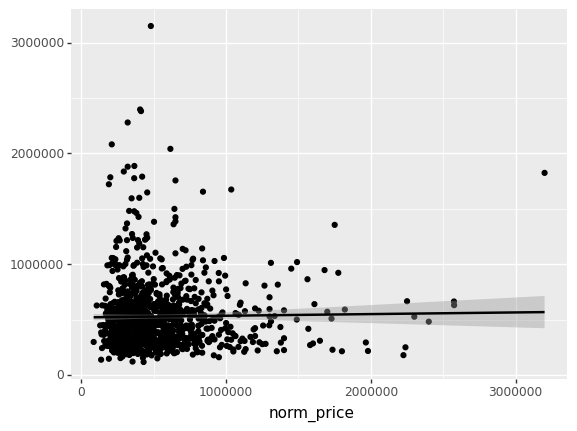

<ggplot: (8745330240413)>

In [ ]:
(ggplot(aes(y = 10**pred_val, x = 10**y_val))+
 geom_point()+
 geom_smooth())

In [ ]:
#Model on unadjusted price
X = one_hot.drop(one_hot.filter(['id', 'lat', 'long', 'price', 'norm_price', 'sqft_living', 'sqft_lot', 'date']).columns, axis=1)
y = one_hot.price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=.3, random_state = 5
)

model = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =4, n_estimators = 250, learning_rate=0.1)
model.fit(X_train, y_train)
pred_val = model.predict(X_val)

In [ ]:
print('r_squared: ', r2_score(y_true = y_val, y_pred = pred_val))
print('MSE: ', (mean_squared_error(y_true = y_val, y_pred = pred_val)))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = y_val, y_pred = pred_val)))))

r_squared:  0.8468034204066932
MSE:  17298696313.3262
RMSE:  131524.50841317067


In [ ]:
model.score(X_val, y_val)

0.8468034204066932

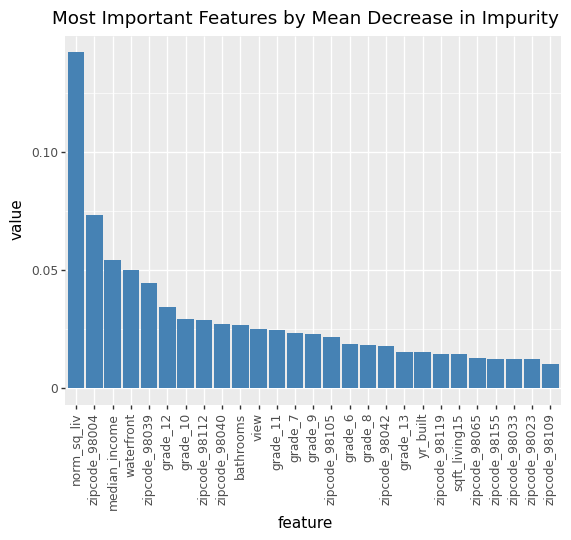

<ggplot: (8745330434809)>

In [ ]:
pd.set_option('display.max_rows', None)
importances = model.feature_importances_
model_importances = pd.Series(importances, index=X_train.columns)
model_importances = pd.DataFrame(model_importances.reset_index())
model_importances = model_importances.rename(columns = {'index': 'feature', 0:'value'})
most_important = model_importances[model_importances['value']>= 0.01]
reorder = most_important.sort_values(by='value', ascending = False).reset_index()
feature_list = list(reorder['feature'])
reorder['feature']= pd.Categorical(reorder['feature'],categories = feature_list, ordered=True)
keep_these = list(most_important['feature'])
(ggplot(reorder, aes(x='feature', y='value'))+
 geom_bar(stat='identity', fill='steelblue')+
 theme(axis_text_x = element_text(angle=90))+
 labs(title = 'Most Important Features by Mean Decrease in Impurity'))

In [ ]:
X = one_hot[keep_these]
y = one_hot.norm_price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=.3, random_state = 5
)

model = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =6, n_estimators = 250, learning_rate=0.1)
model.fit(X_train, y_train)
pred_val = model.predict(X_val)

In [ ]:
print('r_squared: ', r2_score(y_true = y_val, y_pred = pred_val))
print('MSE: ', (mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))))

r_squared:  0.8677193131758144
MSE:  15833326568.86359
RMSE:  125830.54704189913


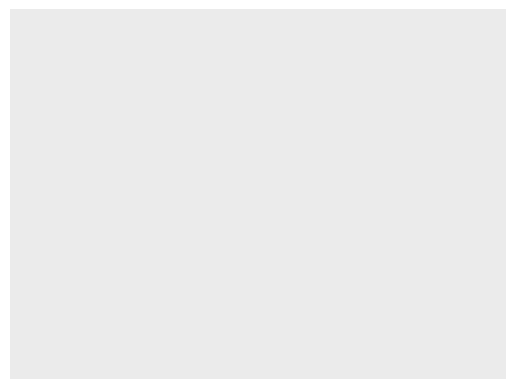

<ggplot: (8745329610537)>

In [ ]:
(ggplot())

In [ ]:
# Build model on normalized price data
X = one_hot.drop(one_hot.filter(['id', 'lat', 'long', 'price', 'norm_price', 'sqft_living', 'sqft_lot', 'date', 'has_bsmnt', 'norm_lot15', 'sqft_lot15']).columns, axis=1)
y = one_hot.norm_price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=.3, random_state = 5
)

model = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =6, n_estimators = 250, learning_rate=0.1)
model = model.fit(X_train, y_train)
pred_val = model.predict(X_val)

In [ ]:
print('r_squared: ', r2_score(y_true = y_val, y_pred = pred_val))
print('MSE: ', (mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))))

r_squared:  0.8777473959585158
MSE:  15133421935.663326
RMSE:  123017.97403494875


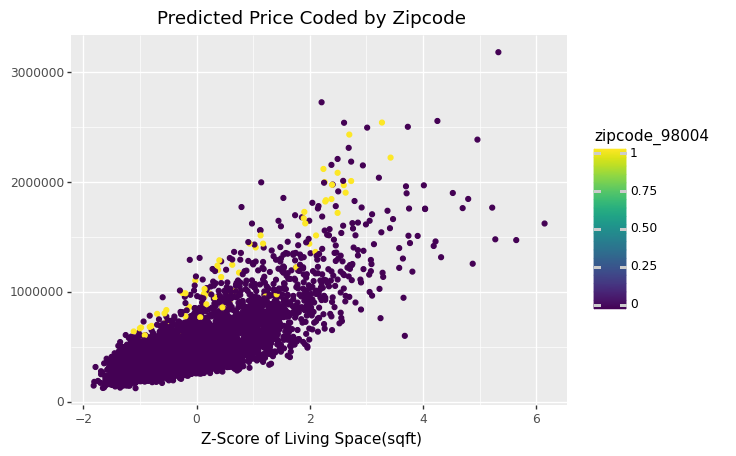

<ggplot: (8745327027289)>

In [ ]:
(ggplot(X_val, aes(x='norm_sq_liv', y=10**pred_val, color='zipcode_98004'))+
 geom_point()+
 labs(title = 'Predicted Price Coded by Zipcode', x='Z-Score of Living Space(sqft)'))

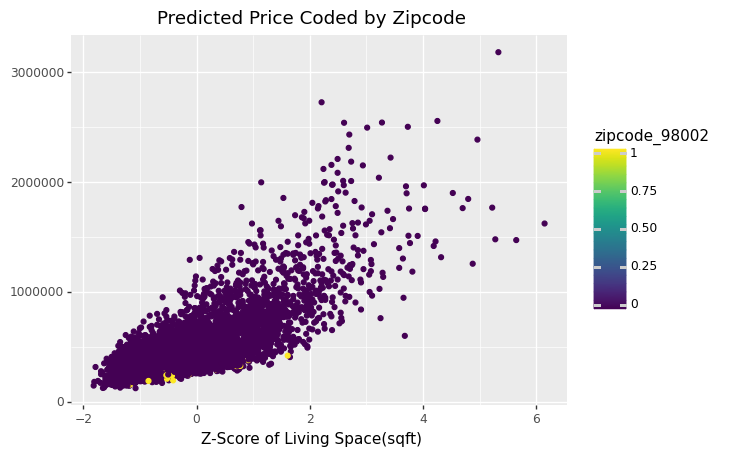

<ggplot: (8745329256633)>

In [ ]:
(ggplot(X_val, aes(x='norm_sq_liv', y=10**pred_val, color='zipcode_98002'))+
 geom_point()+
 labs(title = 'Predicted Price Coded by Zipcode', x='Z-Score of Living Space(sqft)'))

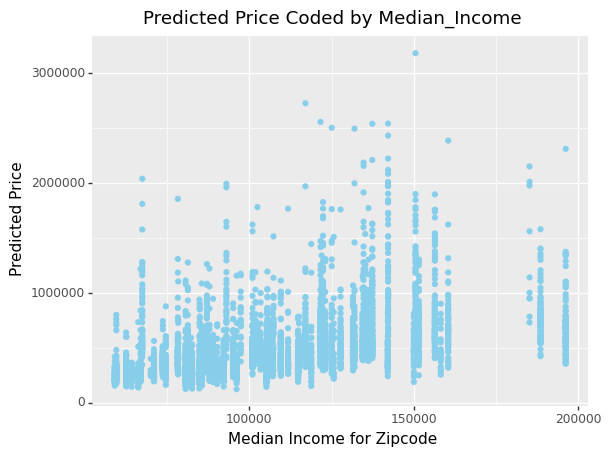

<ggplot: (8745329272569)>

In [ ]:
(ggplot(X_val, aes(x='median_income', y=10**pred_val))+
 geom_point(color = 'skyblue')+
 labs(title = 'Predicted Price Coded by Median_Income', x='Median Income for Zipcode', y='Predicted Price'))

In [ ]:
pd.set_option('display.max_rows', None)
importances = model.feature_importances_
model_importances = pd.Series(importances, index=X_train.columns)
model_importances = pd.DataFrame(model_importances.reset_index())
model_importances = model_importances.rename(columns = {'index': 'feature', 0:'value'})
model_importances.sort_values(by='value', ascending=False)
# most_important = model_importances[model_importances['value']>= 0.005]
# keep_these = list(most_important['feature'])
#keep_these

,feature,value
11,norm_sq_liv,0.080282
10,median_income,0.058971
15,zipcode_98004,0.051915
38,zipcode_98042,0.050692
55,zipcode_98105,0.038234
65,zipcode_98119,0.031097
4,view,0.027339
37,zipcode_98040,0.026094
100,grade_5,0.025184
3,waterfront,0.024626


In [ ]:
df5 = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

df5['date'] = df5['date'].str[:7]
df5['date'] = pd.to_numeric(df5['date'])

X = df5.loc[:, df5.columns != 'price'] 
y = df5["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15, random_state = 35)

modeluno = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =6, n_estimators = 250, learning_rate=0.1)
modeluno.fit(X_train, y_train)
pred_val = modeluno.predict(X_test)
print('r_squared: ', r2_score(y_true = y_test, y_pred = pred_val))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = y_test, y_pred = pred_val)))))

r_squared:  0.8826024586081237
RMSE:  120783.78119260984


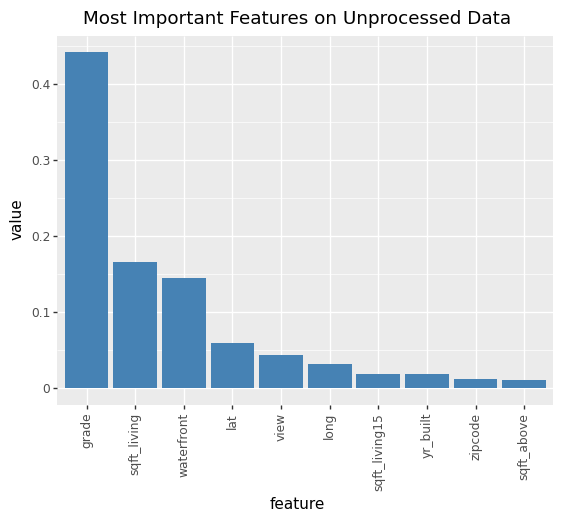

<ggplot: (8745326854293)>

In [ ]:
pd.set_option('display.max_rows', None)
importances = modeluno.feature_importances_
model_importances = pd.Series(importances, index=X_train.columns)
model_importances = pd.DataFrame(model_importances.reset_index())
model_importances = model_importances.rename(columns = {'index': 'feature', 0:'value'})
most_important = model_importances[model_importances['value']>= 0.01]
reorder = most_important.sort_values(by='value', ascending = False).reset_index()
feature_list = list(reorder['feature'])
reorder['feature']= pd.Categorical(reorder['feature'], categories = feature_list, ordered=True)
keep_these = list(most_important['feature'])
(ggplot(reorder, aes(x='feature', y='value'))+
 geom_bar(stat='identity', fill='steelblue')+
 theme(axis_text_x = element_text(angle=90))+
 labs(title = 'Most Important Features on Unprocessed Data'))

In [ ]:
dat1 = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')

#Load medina income
df6 = pd.read_csv("https://raw.githubusercontent.com/Archarlie2000/CS450-Team/main/income.csv", error_bad_lines=False)


#Treating data
dat1['date'] = dat1['date'].str[:8]
df6['NAME'] = df6['NAME'].str[5:]
df6['NAME'] = df6['NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df6.rename(columns = {'NAME':'zipcode'}, inplace = True)
df6.rename(columns = {'S1901_C01_012E':'median_income'}, inplace = True)

#Merge data back in
df7 = pd.merge(dat1, df2, on = "zipcode", how = "left")


from numpy import log10
#Normalize 
# Square living
# Square lot
# Add basement category
# square lot of average 15 nearest homes


#Add zscore column to normalize the data
df7['norm_sq_liv']= stats.zscore(df7['sqft_living'])
df7['norm_sq_lot']=stats.zscore(df7['sqft_lot'])
df7['has_bsmnt'] = df7['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
df7['norm_lot15']=stats.zscore(df7['sqft_lot15'])

#Change Median income to int dtype
df7['median_income']=df7['median_income'].astype(int)

#Change date dtype, convert to string then concat month and year
df7['date']= pd.to_datetime(df7['date'])
df7['year']= pd.DatetimeIndex(df7['date']).year.astype(str)
df7['month'] = pd.DatetimeIndex(df7['date']).month.astype(str)
df7['year_month']= df7['year']+df7['month']
df7 = df7.drop(df3.filter(['year', 'month']).columns, axis=1)




# #Add log column to adjust outlier variables
#Decided not to include after testing
# df3['sq_livlog'] = log10(df3['sqft_living'])
# df3['sq_lotlog'] = log10(df3['sqft_lot'])
# df3['lot15log'] = log10(df3['sqft_lot15'])


#One hot encode the data
mini_hot = pd.get_dummies(data=df7, columns = ['zipcode', 'year_month', 'condition', 'grade'], drop_first=True)
missing_columns = list(set(X_train.columns).difference(mini_hot.columns))
mini_hot[[missing_columns]] = 0
mini_hot = mini_hot[X_train.columns]
X= mini_hot.drop(mini_hot.filter(['id', 'lat', 'long', 'sqft_living', 'sqft_lot', 'date', 'has_bsmnt', 'norm_lot15', 'year', 'month']).columns, axis=1)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




In [ ]:
model = load('model.joblib')
mini_pred = model.predict(X)
predictions = pd.DataFrame(10**mini_pred)
predictions.columns = ['price']
predictions

ValueError: ignored

In [ ]:
mini_hot = mini_hot[X_train.columns]

#Grid search preprocessing

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

#Load medina income
df2 = pd.read_csv("https://raw.githubusercontent.com/Archarlie2000/CS450-Team/main/income.csv", error_bad_lines=False)


#Treating data
dat['date'] = dat['date'].str[:8]
df2['NAME'] = df2['NAME'].str[5:]
df2['NAME'] = df2['NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df2.rename(columns = {'NAME':'zipcode'}, inplace = True)
df2.rename(columns = {'S1901_C01_012E':'median_income'}, inplace = True)

#Merge data back in
df3 = pd.merge(dat, df2, on = "zipcode", how = "left")
df3.head()

from numpy import log10
#Normalize 
# Square living
# Square lot
# Add basement category
# square lot of average 15 nearest homes


#Add zscore column to normalize the data
df3['norm_price']= log10(df3['price'])

#Change Median income to int dtype
df3['median_income']=df3['median_income'].astype(int)

#Change date dtype, convert to string then concat month and year
df3['date']= pd.to_datetime(df3['date'])
df3['year']= pd.DatetimeIndex(df3['date']).year.astype(str)
df3['month'] = pd.DatetimeIndex(df3['date']).month.astype(str)
df3['year_month']= (df3['year']+df3['month']).astype(int)
df4 = df3.drop(df3.filter(['year', 'month']).columns, axis=1)


# #Add log column to adjust outlier variables
#Decided not to include after testing
# df3['sq_livlog'] = log10(df3['sqft_living'])
# df3['sq_lotlog'] = log10(df3['sqft_lot'])
# df3['lot15log'] = log10(df3['sqft_lot15'])


#One hot encode the data
one_hot = pd.get_dummies(data=df4, columns = ['zipcode', 'condition', 'grade'], drop_first=True)

In [ ]:
# Build model on normalized price data
X = one_hot.drop(one_hot.filter(['id', 'lat', 'long', 'price', 'norm_price', 'sqft_living', 'sqft_lot', 'date', 'has_bsmnt', 'norm_lot15']).columns, axis=1)
y = one_hot.norm_price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=.3, random_state = 5
)

model = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =6, n_estimators = 250, learning_rate=0.1)
model.fit(X_train, y_train)
pred_val = model.predict(X_val)

print('r_squared: ', r2_score(y_true = 10**y_val, y_pred = 10**pred_val))
print('MSE: ', (mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))))

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

#Load medina income
df2 = pd.read_csv("https://raw.githubusercontent.com/Archarlie2000/CS450-Team/main/income.csv", error_bad_lines=False)


#Treating data
dat['date'] = dat['date'].str[:8]
df2['NAME'] = df2['NAME'].str[5:]
df2['NAME'] = df2['NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df2.rename(columns = {'NAME':'zipcode'}, inplace = True)
df2.rename(columns = {'S1901_C01_012E':'median_income'}, inplace = True)

#Merge data back in
df3 = pd.merge(dat, df2, on = "zipcode", how = "left")
df3.head()

from numpy import log10
#Normalize 
# Square living
# Square lot
# Add basement category
# square lot of average 15 nearest homes


#Add zscore column to normalize the data
df3['norm_price']= log10(df3['price'])

#Change Median income to int dtype
df3['median_income']=df3['median_income'].astype(int)

#Change date dtype, convert to string then concat month and year
df3['date']= pd.to_datetime(df3['date'])
df3['year']= pd.DatetimeIndex(df3['date']).year.astype(str)
df3['month'] = pd.DatetimeIndex(df3['date']).month.astype(str)
df3['year_month']= (df3['year']+df3['month']).astype(int)
df4 = df3.drop(df3.filter(['year', 'month']).columns, axis=1)


# #Add log column to adjust outlier variables
#Decided not to include after testing
# df3['sq_livlog'] = log10(df3['sqft_living'])
# df3['sq_lotlog'] = log10(df3['sqft_lot'])
# df3['lot15log'] = log10(df3['sqft_lot15'])


#One hot encode the data
one_hot = pd.get_dummies(data=df4, columns = ['zipcode', 'grade'], drop_first=True)
# Build model on normalized price data
X = one_hot.drop(one_hot.filter(['id', 'lat', 'long', 'price', 'norm_price', 'sqft_living', 'sqft_lot', 'date', 'has_bsmnt', 'norm_lot15']).columns, axis=1)
y = one_hot.norm_price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=.3, random_state = 5
)

model = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =6, n_estimators = 250, learning_rate=0.1)
model.fit(X_train, y_train)
pred_val = model.predict(X_val)

print('r_squared: ', r2_score(y_true = 10**y_val, y_pred = 10**pred_val))
print('MSE: ', (mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))))

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

#Load medina income
df2 = pd.read_csv("https://raw.githubusercontent.com/Archarlie2000/CS450-Team/main/income.csv", error_bad_lines=False)


#Treating data
dat['date'] = dat['date'].str[:8]
df2['NAME'] = df2['NAME'].str[5:]
df2['NAME'] = df2['NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df2.rename(columns = {'NAME':'zipcode'}, inplace = True)
df2.rename(columns = {'S1901_C01_012E':'median_income'}, inplace = True)

#Merge data back in
df3 = pd.merge(dat, df2, on = "zipcode", how = "left")
df3.head()

from numpy import log10
#Normalize 
# Square living
# Square lot
# Add basement category
# square lot of average 15 nearest homes


#Add zscore column to normalize the data
df3['norm_price']= log10(df3['price'])

#Change Median income to int dtype
df3['median_income']=df3['median_income'].astype(int)

#Change date dtype, convert to string then concat month and year
df3['date']= pd.to_datetime(df3['date'])
df3['year']= pd.DatetimeIndex(df3['date']).year.astype(str)
df3['month'] = pd.DatetimeIndex(df3['date']).month.astype(str)
df3['year_month']= (df3['year']+df3['month']).astype(int)
df4 = df3.drop(df3.filter(['year', 'month']).columns, axis=1)


# #Add log column to adjust outlier variables
#Decided not to include after testing
# df3['sq_livlog'] = log10(df3['sqft_living'])
# df3['sq_lotlog'] = log10(df3['sqft_lot'])
# df3['lot15log'] = log10(df3['sqft_lot15'])


#One hot encode the data
one_hot = pd.get_dummies(data=df4, columns = ['condition','grade'], drop_first=True)
# Build model on normalized price data
X = one_hot.drop(one_hot.filter(['id', 'lat', 'long', 'price', 'norm_price', 'sqft_living', 'sqft_lot', 'date', 'has_bsmnt', 'norm_lot15']).columns, axis=1)
y = one_hot.norm_price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=.3, random_state = 5
)

model = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =6, n_estimators = 250, learning_rate=0.1)
model.fit(X_train, y_train)
pred_val = model.predict(X_val)

print('r_squared: ', r2_score(y_true = 10**y_val, y_pred = 10**pred_val))
print('MSE: ', (mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))))

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

#Load medina income
df2 = pd.read_csv("https://raw.githubusercontent.com/Archarlie2000/CS450-Team/main/income.csv", error_bad_lines=False)


#Treating data
dat['date'] = dat['date'].str[:8]
df2['NAME'] = df2['NAME'].str[5:]
df2['NAME'] = df2['NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df2.rename(columns = {'NAME':'zipcode'}, inplace = True)
df2.rename(columns = {'S1901_C01_012E':'median_income'}, inplace = True)

#Merge data back in
df3 = pd.merge(dat, df2, on = "zipcode", how = "left")
df3.head()

from numpy import log10
#Normalize 
# Square living
# Square lot
# Add basement category
# square lot of average 15 nearest homes


#Add zscore column to normalize the data
df3['norm_price']= log10(df3['price'])
df3['norm_liv']= log10(df3['sqft_living'])
df3['norm_lot']= log10(df3['sqft_lot'])
df3['norm_lot15']= log10(df3['sqft_lot15'])

#Change Median income to int dtype
df3['median_income']=df3['median_income'].astype(int)

#Change date dtype, convert to string then concat month and year
df3['date']= pd.to_datetime(df3['date'])
df3['year']= pd.DatetimeIndex(df3['date']).year.astype(str)
df3['month'] = pd.DatetimeIndex(df3['date']).month.astype(str)
df3['year_month']= (df3['year']+df3['month']).astype(int)
df4 = df3.drop(df3.filter(['year', 'month']).columns, axis=1)


# #Add log column to adjust outlier variables
#Decided not to include after testing
# df3['sq_livlog'] = log10(df3['sqft_living'])
# df3['sq_lotlog'] = log10(df3['sqft_lot'])
# df3['lot15log'] = log10(df3['sqft_lot15'])


#One hot encode the data
one_hot = pd.get_dummies(data=df4, columns = ['zipcode', 'condition', 'grade'], drop_first=True)
# Build model on normalized price data
X = one_hot.drop(one_hot.filter(['id', 'lat', 'long', 'price', 'norm_price', 'sqft_living', 'sqft_lot', 'date', 'has_bsmnt', 'sqft_lot15']).columns, axis=1)
y = one_hot.norm_price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=.3, random_state = 5
)

model = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =6, n_estimators = 250, learning_rate=0.1)
model.fit(X_train, y_train)
pred_val = model.predict(X_val)

print('r_squared: ', r2_score(y_true = 10**y_val, y_pred = 10**pred_val))
print('MSE: ', (mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = 10**y_val, y_pred = 10**pred_val)))))

#Use This Model

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

#Load medina income
df2 = pd.read_csv("https://raw.githubusercontent.com/Archarlie2000/CS450-Team/main/income.csv", error_bad_lines=False)


#Treating data
dat['date'] = dat['date'].str[:8]
df2['NAME'] = df2['NAME'].str[5:]
df2['NAME'] = df2['NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df2.rename(columns = {'NAME':'zipcode'}, inplace = True)
df2.rename(columns = {'S1901_C01_012E':'median_income'}, inplace = True)

#Merge data back in
df3 = pd.merge(dat, df2, on = "zipcode", how = "left")
df3.head()

from numpy import log10
#Normalize 
# Square living
# Square lot
# Add basement category
# square lot of average 15 nearest homes


#Add zscore column to normalize the data
df3['norm_price']= log10(df3['price'])

#Change Median income to int dtype
df3['median_income']=df3['median_income'].astype(int)

#Change date dtype, convert to string then concat month and year
df3['date']= pd.to_datetime(df3['date'])
df3['year']= pd.DatetimeIndex(df3['date']).year.astype(str)
df3['month'] = pd.DatetimeIndex(df3['date']).month.astype(str)
df3['year_month']= (df3['year']+df3['month']).astype(int)
df4 = df3.drop(df3.filter(['year', 'month']).columns, axis=1)


# #Add log column to adjust outlier variables
#Decided not to include after testing
# df3['sq_livlog'] = log10(df3['sqft_living'])
# df3['sq_lotlog'] = log10(df3['sqft_lot'])
# df3['lot15log'] = log10(df3['sqft_lot15'])


#One hot encode the data
one_hot = pd.get_dummies(data=df4, columns = ['zipcode', 'condition', 'grade'], drop_first=True)
# Build model on normalized price data
X = one_hot.drop(one_hot.filter(['id', 'price', 'norm_price', 'date', 'has_bsmnt']).columns, axis=1)
y = one_hot.norm_price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state = 5
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=.3, random_state = 5
)

model = XGBRegressor(objective = 'reg:squarederror', min_child_weight=3, max_depth =6, n_estimators = 250, learning_rate=0.1)
model.fit(X_train, y_train)
pred_val = model.predict(X_test)

print('r_squared: ', r2_score(y_true = 10**y_test, y_pred = 10**pred_val))
print('MSE: ', (mean_squared_error(y_true = 10**y_test, y_pred = 10**pred_val)))
print('RMSE: ', ((math.sqrt(mean_squared_error(y_true = 10**y_test, y_pred = 10**pred_val)))))
print('MAE: ', mean_absolute_error(y_true = 10**y_test, y_pred=10**pred_val))
dump(model, 'model.joblib')

r_squared:  0.8835394749452424
MSE:  14972435425.948664
RMSE:  122361.90349103214
MAE:  62141.037583984384


['model.joblib']

In [ ]:
(ggplot(aes(x=X_test.sqft_living, y=10**pred_val, color=X_test['median_income']<=70000))+
 geom_point()+
 labs(title = 'Price vs Living Space', key='Median Income <= 70000', color = 'Median Income \n<= $70000\n'))

In [ ]:
dat1 = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv')

#Load medina income
df6 = pd.read_csv("https://raw.githubusercontent.com/Archarlie2000/CS450-Team/main/income.csv", error_bad_lines=False)


#Treating data
dat1['date'] = dat1['date'].str[:8]
df6['NAME'] = df6['NAME'].str[5:]
df6['NAME'] = df6['NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df6.rename(columns = {'NAME':'zipcode'}, inplace = True)
df6.rename(columns = {'S1901_C01_012E':'median_income'}, inplace = True)

#Merge data back in
df7 = pd.merge(dat1, df2, on = "zipcode", how = "left")


from numpy import log10
#Normalize 
# Square living
# Square lot
# Add basement category
# square lot of average 15 nearest homes


#Add zscore column to normalize the data
df7['norm_sq_liv']= stats.zscore(df7['sqft_living'])
df7['norm_sq_lot']=stats.zscore(df7['sqft_lot'])
df7['has_bsmnt'] = df7['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
df7['norm_lot15']=stats.zscore(df7['sqft_lot15'])

#Change Median income to int dtype
df7['median_income']=df7['median_income'].astype(int)

#Change date dtype, convert to string then concat month and year
df7['date']= pd.to_datetime(df7['date'])
df7['year']= pd.DatetimeIndex(df7['date']).year.astype(str)
df7['month'] = pd.DatetimeIndex(df7['date']).month.astype(str)
df7['year_month']= (df7['year']+df7['month']).astype(int)
df7 = df7.drop(df3.filter(['year', 'month']).columns, axis=1)




# #Add log column to adjust outlier variables
#Decided not to include after testing
# df3['sq_livlog'] = log10(df3['sqft_living'])
# df3['sq_lotlog'] = log10(df3['sqft_lot'])
# df3['lot15log'] = log10(df3['sqft_lot15'])


#One hot encode the data
mini_hot = pd.get_dummies(data=df7, columns = ['zipcode', 'condition', 'grade'], drop_first=True)
missing_columns = list(set(X_train.columns).difference(mini_hot.columns))
mini_hot[[missing_columns]] = 0
mini_hot = mini_hot[X_train.columns]
X= mini_hot.drop(mini_hot.filter(['id', 'date', 'has_bsmnt', 'year', 'month']).columns, axis=1)




model = load('model.joblib')
mini_pred = model.predict(X)
predictions = pd.DataFrame(10**mini_pred)
predictions.columns = ['price']
predictions.to_csv('team6-module3-predictions.csv', index=False)
predictions

In [ ]:
predicted_price = pd.DataFrame(10**y_test)
predicted_price.columns = ['actual']
predicted_price['predicted'] = 10**pred_val
predicted_price['difference'] = abs(predicted_price['actual'] - predicted_price['predicted'])

predicted_price = predicted_price.query('difference <= 1200000')
print(predicted_price['difference'].max())

1185905.8749999981


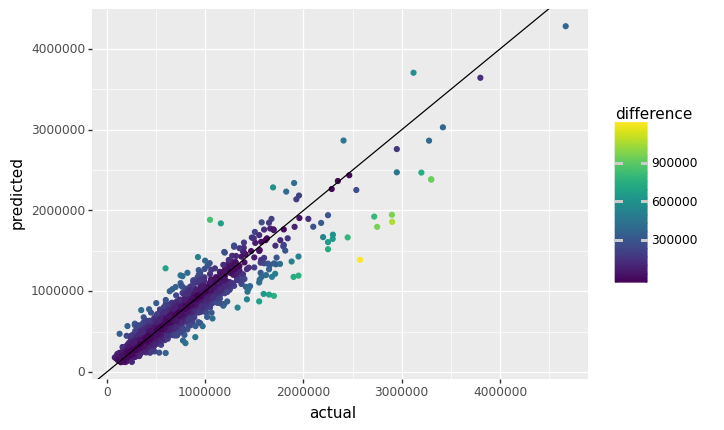

<ggplot: (8745326605309)>

In [ ]:
chart = ggplot(predicted_price, aes(x='actual', y='predicted', color = 'difference'))+geom_point()
chart + geom_abline()